# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../Day_018/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

        DAYS_BIRTH  TARGET  YEARS_BIRTH YEARS_BIRTH_GROUP
0             9461       1    25.920548          (20, 30]
1            16765       0    45.931507          (40, 50]
2            19046       0    52.180822          (50, 60]
3            19005       0    52.068493          (50, 60]
4            19932       0    54.608219          (50, 60]
...            ...     ...          ...               ...
307506        9327       0    25.553425          (20, 30]
307507       20775       0    56.917808          (50, 60]
307508       14966       0    41.002740          (40, 50]
307509       11961       1    32.769863          (30, 40]
307510       16856       0    46.180822          (40, 50]

[307511 rows x 4 columns]


<AxesSubplot:xlabel='YEARS_BIRTH_GROUP', ylabel='TARGET'>

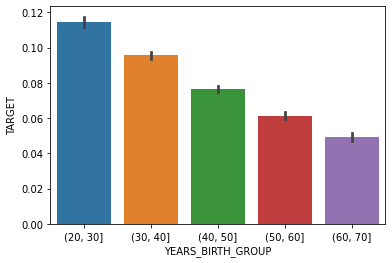

In [10]:
from math import ceil
import seaborn as sns
sub_app_train=app_train.loc[:,['DAYS_BIRTH','TARGET']]
sub_app_train['YEARS_BIRTH']=sub_app_train['DAYS_BIRTH']/365
sub_app_train['YEARS_BIRTH_GROUP']=pd.cut(sub_app_train['YEARS_BIRTH'],range(20,ceil(sub_app_train['YEARS_BIRTH'].max()+10),10))
print(sub_app_train)
sns.barplot(x="YEARS_BIRTH_GROUP", y="TARGET", data=sub_app_train)

In [6]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [8]:
app_train['equal_width'].value_counts().sort_index()

(25649.999, 81000.0]       33391
(81000.0, 99000.0]         30280
(99000.0, 112500.0]        36907
(112500.0, 135000.0]       48849
(135000.0, 147150.0]        4333
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(180000.0, 225000.0]       44809
(225000.0, 270000.0]       19957
(270000.0, 117000000.0]    27161
Name: equal_width, dtype: int64

([<matplotlib.axis.XTick at 0x1e0728ba2b0>,
 [Text(0, 0, '(25649.999, 81000.0]'),
  Text(1, 0, '(81000.0, 99000.0]'),
  Text(2, 0, '(99000.0, 112500.0]'),
  Text(3, 0, '(112500.0, 135000.0]'),
  Text(4, 0, '(135000.0, 147150.0]'),
  Text(5, 0, '(147150.0, 162000.0]'),
  Text(6, 0, '(162000.0, 180000.0]'),
  Text(7, 0, '(180000.0, 225000.0]'),
  Text(8, 0, '(225000.0, 270000.0]'),
  Text(9, 0, '(270000.0, 117000000.0]')])

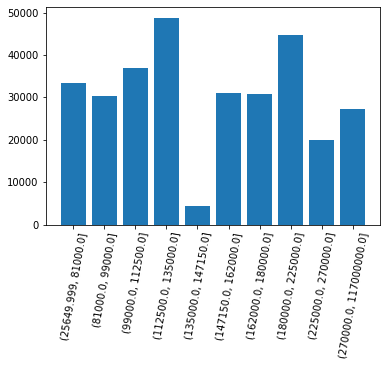

In [9]:
plt.bar(range(len(app_train['equal_width'].value_counts().sort_index().index)), app_train['equal_width'].value_counts().sort_index().values )
plt.xticks(range(len(app_train['equal_width'].value_counts().sort_index().index)), app_train['equal_width'].value_counts().sort_index().index, rotation=80)
